In [ ]:
##Table of Contents

1-Introduction
2-Data Loading
3-Data Preprocessing
4-Exploratory Data Analysis
 4.1. Correlation Analysis
5-Model Training
 5.1. Random Forest Regressor
  5.1.1. Introduction to Random Forest Regressor
  5.1.2. Hyperparameter Tuning
   5.1.2.1. Grid Search for Hyperparameter Tuning
   5.1.2.2. Best Hyperparameters Selection
  5.1.3. Model Training Process
  5.1.4. Model Predictions
 5.2. Random Forest Classifier
  5.2.1. Introduction to Random Forest Classifier
  5.2.2. Hyperparameter Tuning
   5.2.2.1. Grid Search for Hyperparameter Tuning
   5.2.2.2. Best Hyperparameters Selection
  5.2.3. Model Training Process
  5.2.4. Model Predictions
6-Model Evaluation
 6.1. Random Forest Regressor Evaluation
  6.1.1. Mean Squared Error (MSE)
  6.1.2. Mean Absolute Error (MAE)
  6.1.3. R² Score
 6.2. Random Forest Classifier Evaluation
  6.2.1. Accuracy
  6.2.2. Precision, Recall, and F1 Score
  6.2.3. ROC Curve and AUC
7-Conclusion


In [44]:
import pandas as pd

# Red Wine Data upload
df_red = pd.read_csv('winequality-red.csv', delimiter=';')


# Preview the first few rows
print("Red Wine Data:")
print(df_red.head(), df_red.info())




Red Wine Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.7

In [45]:
#data preprocessing
df_red['quality'] = df_red['quality'].astype(float)


print(df_red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB
None


In [46]:
# Basic statistical features for red wine
print("Red Wine Statistics:")
print(df_red.describe())



Red Wine Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [47]:
# Missing data analysis
print("Red Wine Missing Values:")
print(df_red.isnull().sum())



Red Wine Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


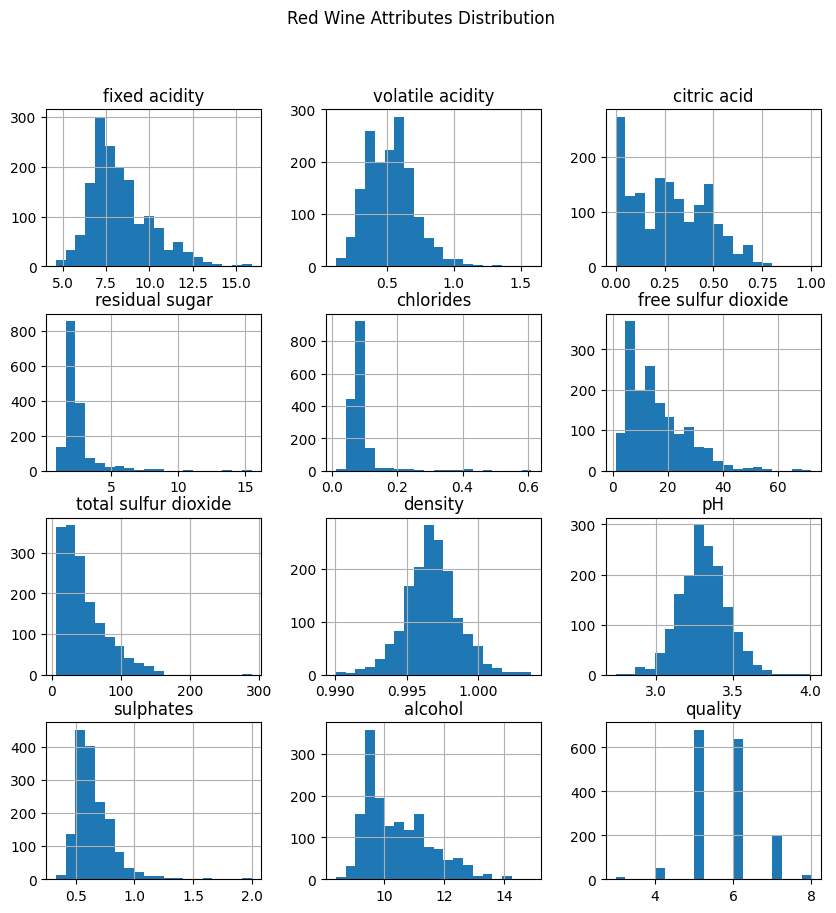

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of red wine features
df_red.hist(bins=20, figsize=(10, 10))
plt.suptitle('Red Wine Attributes Distribution')
plt.show()



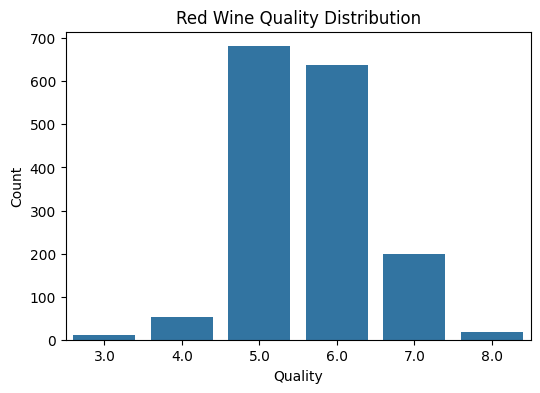

In [49]:
#Distribution of the target variable for red wine
plt.figure(figsize=(6, 4))
sns.countplot(x=df_red['quality'])
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The most common quality scores are 5 and 6. The least common scores are 3 and 8. The graph shows a noticeable imbalance in the distribution of quality scores.

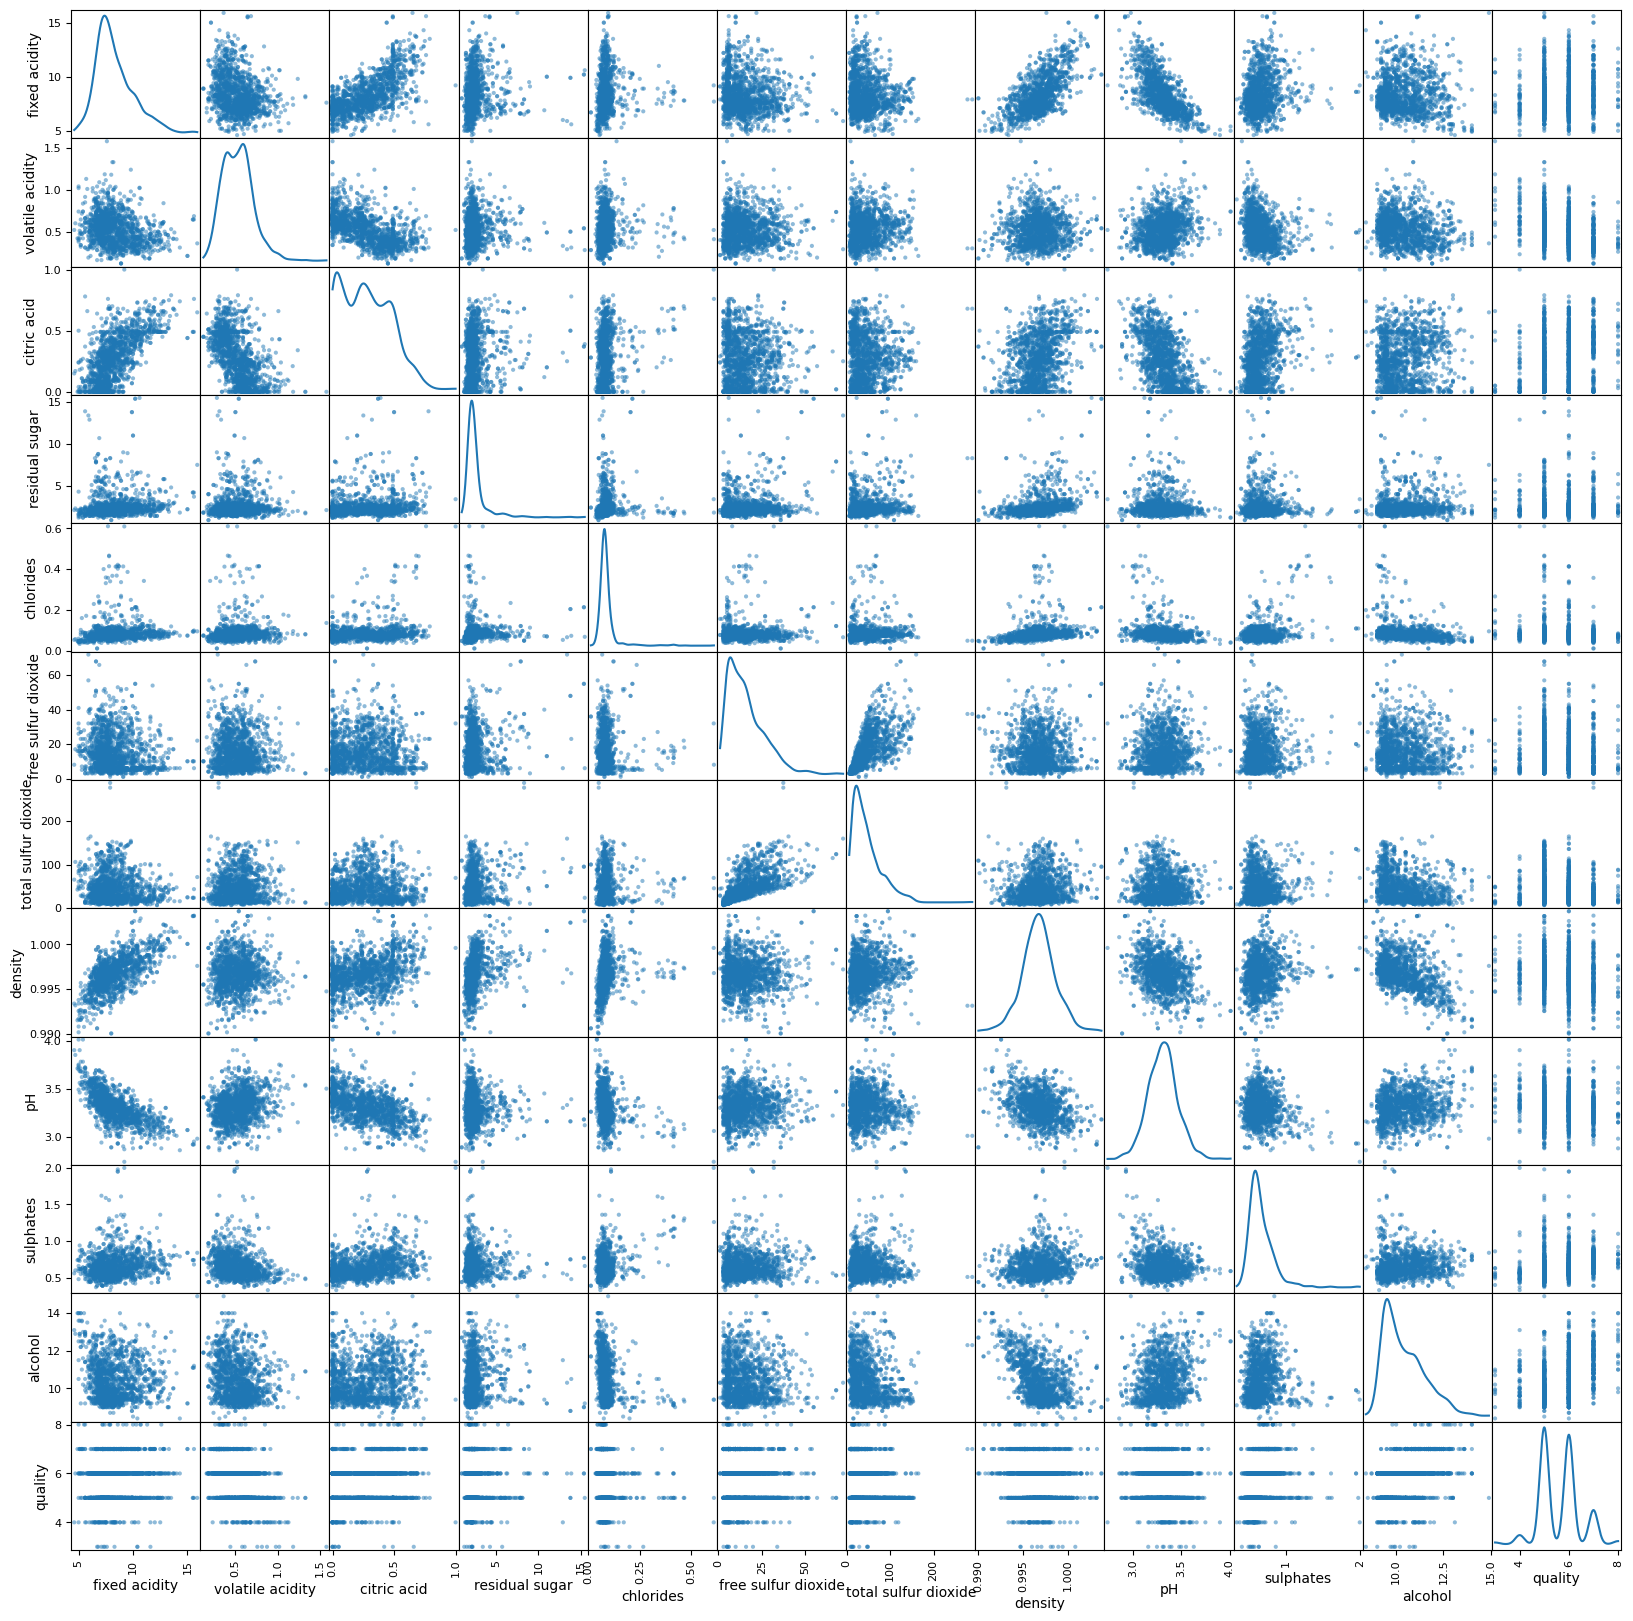

In [50]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Generating pairwise scatter plots of all features
scatter_matrix(df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']], figsize=(20, 20), diagonal='kde')

# Show plots
plt.show()

Visualizing and analyzing the relationships between variables in the red wine dataset using correlation coefficients.



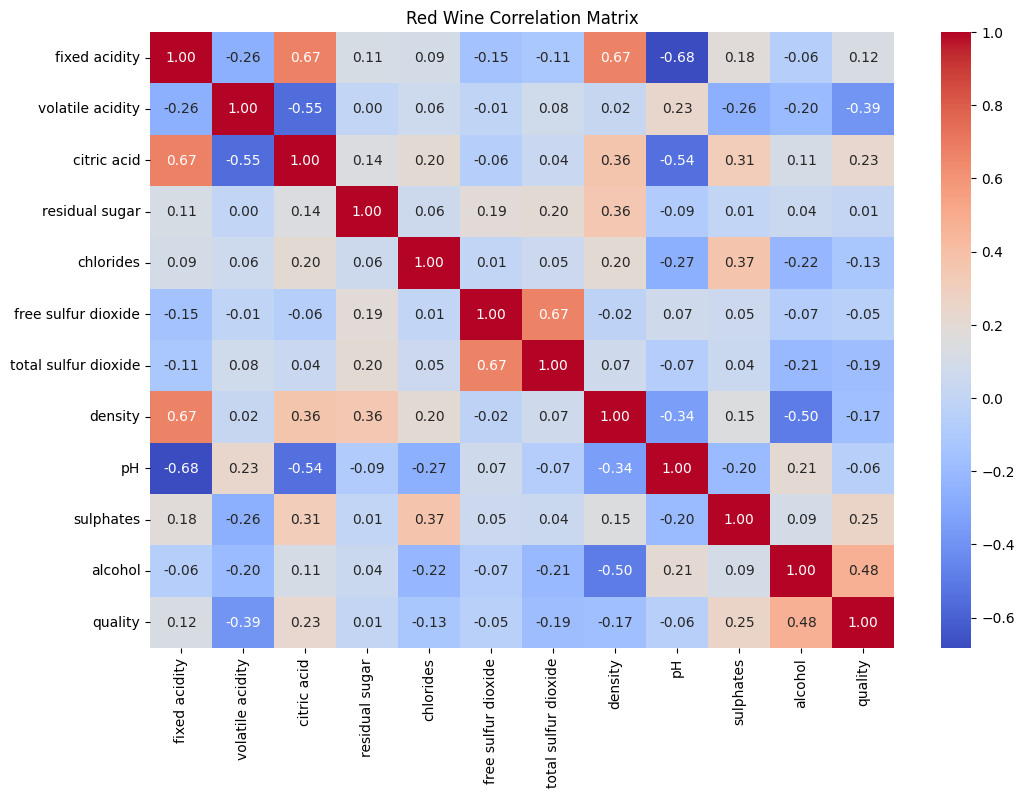

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# The correlation matrix of red wine features
plt.figure(figsize=(12, 8))
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Red Wine Correlation Matrix')
plt.show()



**Correlations with Quality:**

**Alcohol:** The variable with the highest positive correlation with quality (0.48) is alcohol. This indicates that wines with higher alcohol content generally have higher quality scores.
**Volatile Acidity:** Shows a negative correlation with quality (-0.39). This indicates that as volatile acidity increases, quality generally decreases.
**Sulfates:** Shows a positive correlation (0.25). This suggests that an increase in sulfates can positively affect quality.
**Citric Acid:** Shows a positive correlation (0.23). This suggests that an increase in citric acid can positively affect quality.


**Fixed Acidity and pH:** There is a negative correlation (-0.68) between these two variables. This indicates that as fixed acidity increases, the pH value decreases.
**Fixed Acidity and Density:** Shows a positive correlation (0.67). This indicates that as fixed acidity increases, density also increases.
Total Sulfur Dioxide and **Free Sulfur Dioxide:** Shows a strong positive correlation (0.67). This indicates that as the amount of total sulfur dioxide increases, the amount of free sulfur dioxide also increases.



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

In [54]:
#The data was split into 80% training and 20% test sets.
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


In [55]:
#LinearRegression
lr_model_red = LinearRegression()
lr_model_red.fit(X_train_red, y_train_red)
# Fitting the model to the training se
lr_predictions_red = lr_model_red.predict(X_test_red)
# The trained model was used to make predictions on the test set
lr_mse_red = mean_squared_error(y_test_red, lr_predictions_red)
lr_mae_red = mean_absolute_error(y_test_red, lr_predictions_red)
lr_r2_red = r2_score(y_test_red, lr_predictions_red)

print("Linear Regression:")
print("Mean Squared Error:", lr_mse_red)
print("Mean Absolute Error:", lr_mae_red)
print("R-squared:", lr_r2_red)



Linear Regression:
Mean Squared Error: 0.3900251439639542
Mean Absolute Error: 0.5035304415524375
R-squared: 0.403180341279623


In [61]:
# Decision Tree Model
dt_model_red = DecisionTreeRegressor()
dt_model_red.fit(X_train_red, y_train_red)
dt_predictions_red = dt_model_red.predict(X_test_red)

# Model Evaluation
dt_mse_red = mean_squared_error(y_test_red, dt_predictions_red)
dt_mae_red = mean_absolute_error(y_test_red, dt_predictions_red)
dt_r2_red = r2_score(y_test_red, dt_predictions_red)

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse_red)
print("Mean Absolute Error:", dt_mae_red)
print("R-squared:", dt_r2_red)


Decision Tree Regression:
Mean Squared Error: 0.584375
Mean Absolute Error: 0.453125
R-squared: 0.10578460526905664


In [59]:

# Random Forest Model
rf_model_red = RandomForestRegressor(random_state=42)
rf_model_red.fit(X_train_red, y_train_red)
rf_predictions_red = rf_model_red.predict(X_test_red)

# Performance Evaluation
rf_mse_red = mean_squared_error(y_test_red, rf_predictions_red)
rf_mae_red = mean_absolute_error(y_test_red, rf_predictions_red)
rf_r2_red = r2_score(y_test_red, rf_predictions_red)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse_red)
print("Mean Absolute Error:", rf_mae_red)
print("R-squared:", rf_r2_red)

Random Forest Regression:
Mean Squared Error: 0.30123812499999997
Mean Absolute Error: 0.4224375
R-squared: 0.5390429623873638


 The Random Forest model has both lower MSE and MAE values compared to other models, and a higher R² score. This clearly demonstrates that the Random Forest model outperforms the Linear Regression and Decision Tree models.

To control for overfitting, let's try Random Forest Regression by dropping highly correlated features. The columns suggested for removal are: ['citric acid', 'total sulfur dioxide', 'density', 'pH'].

In [64]:

df_red = df_red.drop(['total sulfur dioxide'], axis=1)

# Define the features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

In [65]:
# Random Forest Model
rf_model_red = RandomForestRegressor(random_state=42)
rf_model_red.fit(X_train_red, y_train_red)
rf_predictions_red = rf_model_red.predict(X_test_red)

# Performance Evaluation
rf_mse_red = mean_squared_error(y_test_red, rf_predictions_red)
rf_mae_red = mean_absolute_error(y_test_red, rf_predictions_red)
rf_r2_red = r2_score(y_test_red, rf_predictions_red)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse_red)
print("Mean Absolute Error:", rf_mae_red)
print("R-squared:", rf_r2_red)

Random Forest Regression:
Mean Squared Error: 0.30123812499999997
Mean Absolute Error: 0.4224375
R-squared: 0.5390429623873638


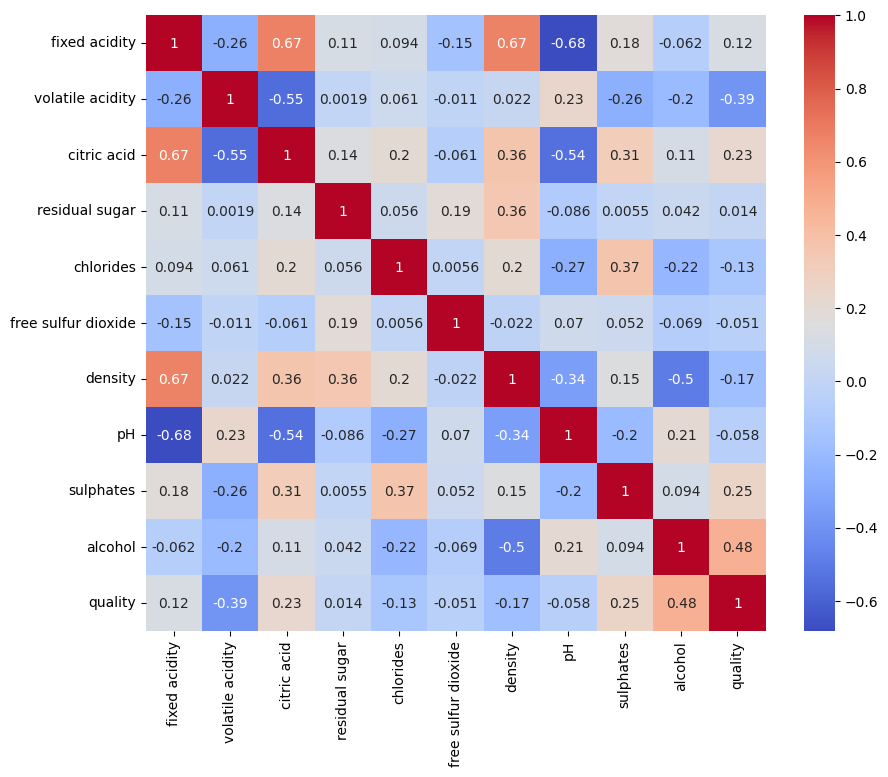

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_red.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Random Forest Regression:
Mean Squared Error: 0.3151034375
Mean Absolute Error: 0.43246874999999996
R-squared: 0.5178261480297076
Number of features in X_red: 10
Number of feature importances: 10


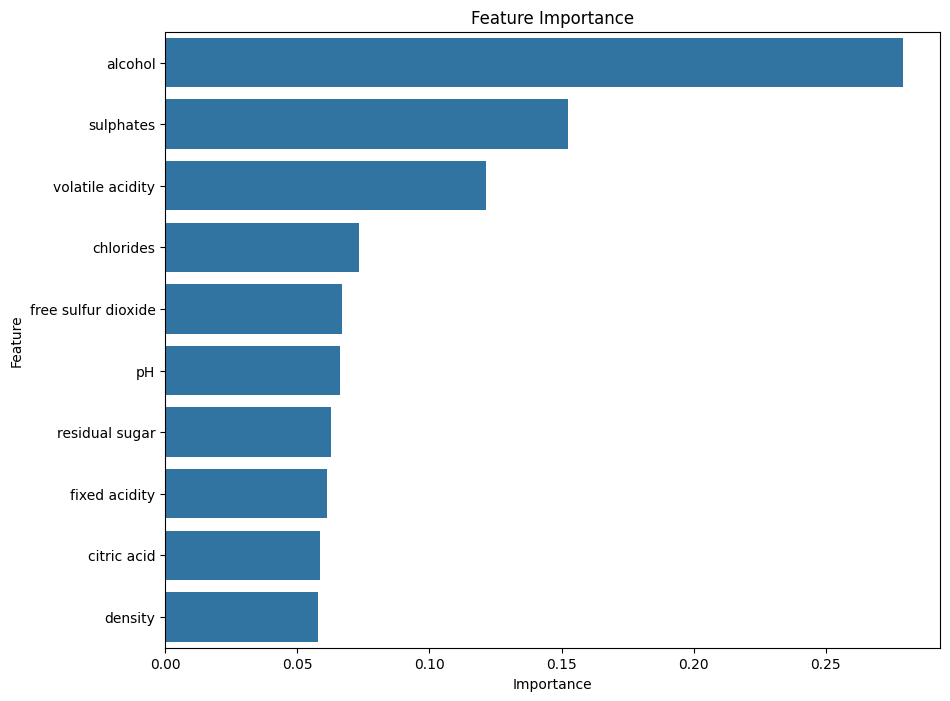

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Remove the 'total sulfur dioxide' column from the dataset
df_red = df_red.drop(['total sulfur dioxide'], axis=1)

# Define the features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# split the data into training and test sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# train a Random Forest model,
rf_model_red = RandomForestRegressor(random_state=42)
rf_model_red.fit(X_train_red, y_train_red)
rf_predictions_red = rf_model_red.predict(X_test_red)

# evaluate its performance
rf_mse_red = mean_squared_error(y_test_red, rf_predictions_red)
rf_mae_red = mean_absolute_error(y_test_red, rf_predictions_red)
rf_r2_red = r2_score(y_test_red, rf_predictions_red)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse_red)
print("Mean Absolute Error:", rf_mae_red)
print("R-squared:", rf_r2_red)

# Checking column lengths
print("Number of features in X_red:", len(X_red.columns))
print("Number of feature importances:", len(rf_model_red.feature_importances_))

# Analyze feature importance.
importances = rf_model_red.feature_importances_
feature_names = X_red.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In the graph, alcohol, sulphates, volatile acidity, and chlorides emerge as the most important features. The results show that removing the total sulfur dioxide column did not significantly affect model performance. This indicates that the total sulfur dioxide column has minimal impact on the target variable or that the model already captures this information through other features.

In [75]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_red, y_train_red)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions using the best model

best_rf_model_red = grid_search.best_estimator_
best_rf_predictions_red = best_rf_model_red.predict(X_test_red)

# PEvaluate model performance
best_rf_mse_red = mean_squared_error(y_test_red, best_rf_predictions_red)
best_rf_mae_red = mean_absolute_error(y_test_red, best_rf_predictions_red)
best_rf_r2_red = r2_score(y_test_red, best_rf_predictions_red)

print("Optimized Random Forest Regression:")
print("Mean Squared Error:", best_rf_mse_red)
print("Mean Absolute Error:", best_rf_mae_red)
print("R-squared:", best_rf_r2_red)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Regression:
Mean Squared Error: 0.30659526694254524
Mean Absolute Error: 0.42834247705515505
R-squared: 0.5308454200613185


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Separate features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Include both Manhattan and Euclidean distance options
}

# Create a K-Fold cross-validation strategy (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi skor (negatif MSE):", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("Test kümesi MSE:", mse)


En iyi hiperparametreler: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
En iyi skor (negatif MSE): -0.39510742559227296
Test kümesi MSE: 0.301889383863707


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Split features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the KNN model
knn_model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan ve Euclidean uzaklığı için
}

# Set up a K-Fold cross-validation strategy (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to find the best hyperparameters for KNN
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=kf, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("KNN En iyi hiperparametreler:", grid_search_knn.best_params_)
print("KNN En iyi skor (negatif MSE):", grid_search_knn.best_score_)

# Use the best model to make predictions on the test set
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Test kümesi MSE:", mse_knn)

# Build the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Use GridSearchCV to find the best hyperparameters for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=kf, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("RF En iyi hiperparametreler:", grid_search_rf.best_params_)
print("RF En iyi skor (negatif MSE):", grid_search_rf.best_score_)

# Use the best model to make predictions on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RF Test kümesi MSE:", mse_rf)


KNN En iyi hiperparametreler: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
KNN En iyi skor (negatif MSE): -0.39510742559227296
KNN Test kümesi MSE: 0.301889383863707


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RF En iyi hiperparametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RF En iyi skor (negatif MSE): -0.3536186836873639
RF Test kümesi MSE: 0.2942919791666666


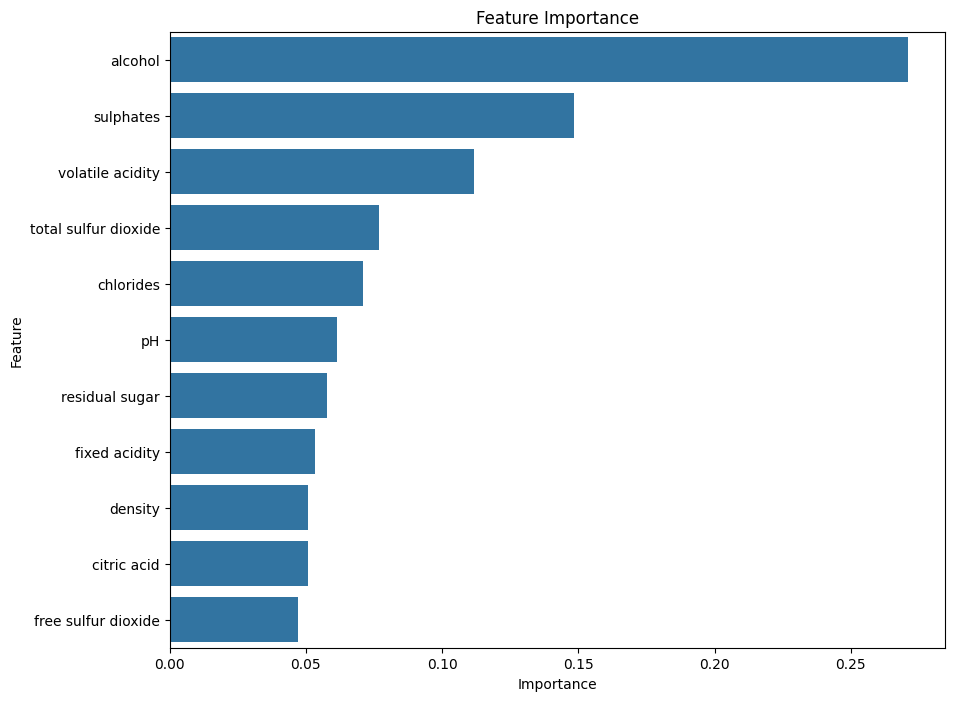

Selected Features KNN Test kümesi MSE: 0.3121886915939886


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Selected Features RF Test kümesi MSE: 0.2990260415076415


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Split features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Determine feature importance
importances = rf_model.feature_importances_
feature_names = X_red.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Recreate the dataset using the most important features
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature']
X_red_selected = X_red[selected_features]

# Split the updated data into training and test sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_red_selected, y_red, test_size=0.2, random_state=42)

# Rescale the features
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

# KNN and Random Forest models
# KNN Model
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=kf, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_sel, y_train_sel)
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_sel)
mse_knn = mean_squared_error(y_test_sel, y_pred_knn)
print("Selected Features KNN Test kümesi MSE:", mse_knn)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=kf, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_sel, y_train_sel)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_sel)
mse_rf = mean_squared_error(y_test_sel, y_pred_rf)
print("Selected Features RF Test kümesi MSE:", mse_rf)


In [86]:
!pip install scipy

In [88]:

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

# Load Dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Split features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Build Random Forest model
rf_model = RandomForestRegressor()

# Define hyperparameter distributions (with wider ranges and more parameters)
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]  # Bootstrap örneklemesini ekle
}

# Use RandomizedSearchCV to find the best hyperparameters (with more iterations)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("En iyi hiperparametreler:", random_search.best_params_)
print("En iyi skor (negatif MSE):", random_search.best_score_)

# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MSE, MAE, and R-squared on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test kümesi MSE:", mse)
print("Test kümesi MAE:", mae)
print("Test kümesi R-kare:", r2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

En iyi hiperparametreler: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 297}
En iyi skor (negatif MSE): -0.36001518572940105
Test kümesi MSE: 0.29875989121535185
Test kümesi MAE: 0.4165643489170712
Test kümesi R-kare: 0.5428351759522404


In [89]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

# Load Dataset
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Split features and target variable
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Build XGBoost model
xgb_model = XGBRegressor()

# Define hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.4),
    'colsample_bytree': uniform(0.5, 0.4)
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("En iyi hiperparametreler:", random_search.best_params_)
print("En iyi skor (negatif MSE):", random_search.best_score_)

# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MSE, MAE, and R² (R-squared) on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test kümesi MSE:", mse)
print("Test kümesi MAE:", mae)
print("Test kümesi R-kare:", r2)


En iyi hiperparametreler: {'colsample_bytree': 0.6755885682822544, 'learning_rate': 0.033536914402679786, 'max_depth': 7, 'n_estimators': 267, 'subsample': 0.8850593658711701}
En iyi skor (negatif MSE): -0.36574211932316625
Test kümesi MSE: 0.29653113945385456
Test kümesi MAE: 0.4066109836101532
Test kümesi R-kare: 0.5462456300889926


In [4]:
import pandas as pd

df_red = pd.read_csv('winequality-red.csv', sep=';')

# Descriptive Statistics of Numeric Variables
df_red.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


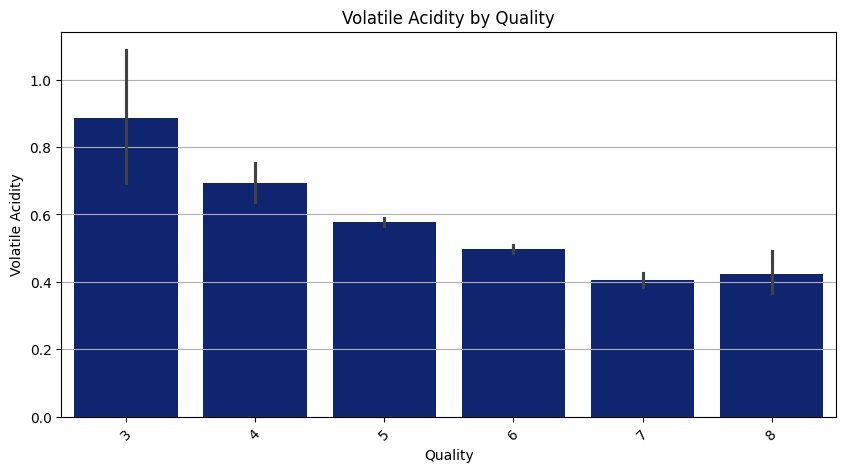

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The axes are the individual plotting areas within the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
sns.barplot(x='quality', y='volatile acidity', data=df_red, ax=ax)

# Set plot title and axis labels
ax.set_title('Volatile Acidity by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')

# Customize plot aesthetics
ax.grid(True, axis='y')
sns.set_palette('dark')
plt.xticks(rotation=45)

# Display the plot
plt.show()

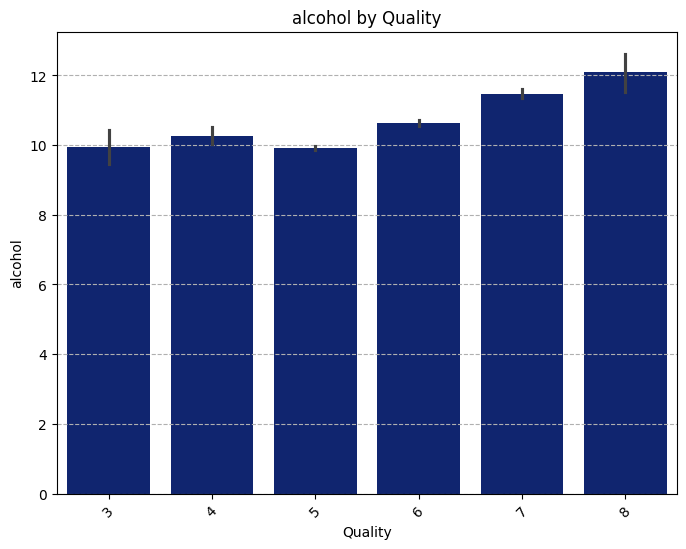

In [11]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
sns.barplot(x='quality', y='alcohol', data=df_red, ax=ax)

# Set plot title and axis labels
ax.set_title('alcohol by Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('alcohol')

# Customize plot aesthetics
ax.grid(True, axis='y', linestyle='--')
sns.set_palette('dark')  # Change color palette
plt.xticks(rotation=45)  # Rotate x-axis labels

# Display the plot
plt.show()

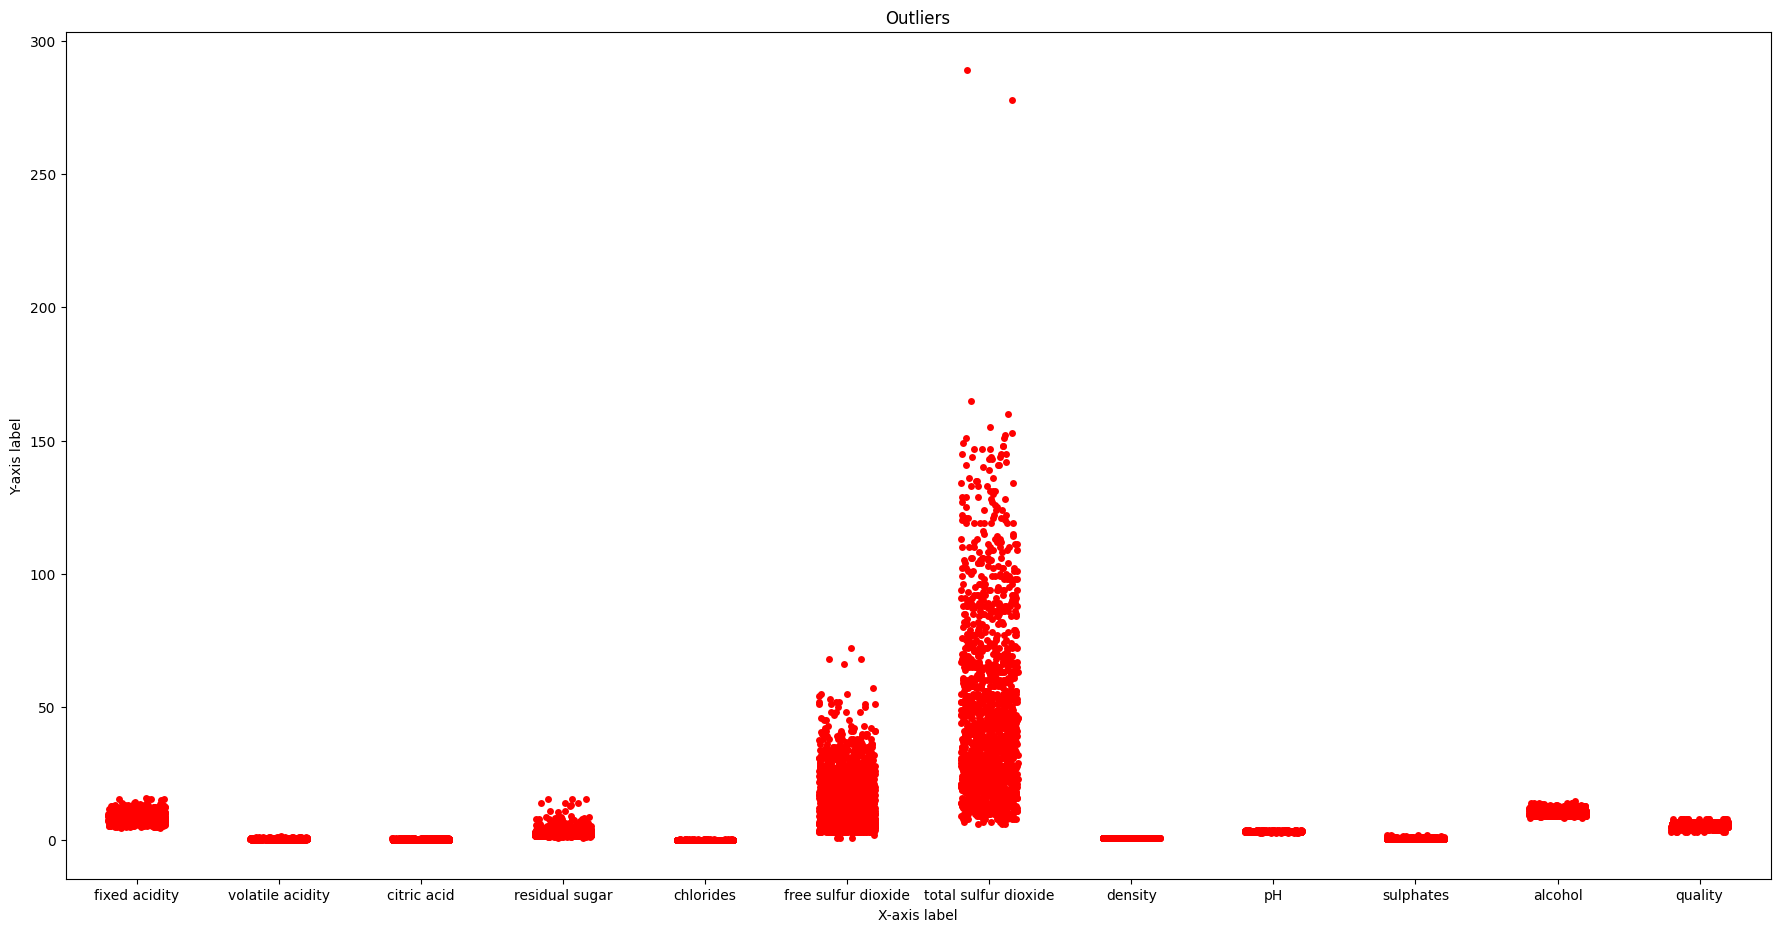

In [16]:
# Set the figure size
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=df_red, color="red", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

# Show the plot
plt.show()

Data Preprocessing

In [18]:
# Split the data into features (X) and target variable (Y)
X = df_red.drop('quality',axis=1)

# Create a new series 'Y' by applying a lambda function to the 'quality' column of the 'data' DataFrame
# The lambda function assigns a value of 1 if the 'quality' value is greater than or equal to 5, otherwise assigns 0
Y = df_red['quality'].apply(lambda y_value: 1 if y_value >= 5 else 0)

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1599, 11)
Shape of Y: (1599,)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Rescale and normalize the features
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)


# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Model Selection

In [25]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (1279, 11)
Shape of X_test: (320, 11)
Shape of Y_train: (1279,)
Shape of Y_test: (320,)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Identify features and the target variable
X = df_red.drop('quality', axis=1)
y = df_red['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Classifier model
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

# Training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.65625


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from termcolor import colored

# Initialize lists to store accuracy scores
scoreListRF_Train = []
scoreListRF_Test = []

# Iterate over different values of max_depth
for max_dep in range(1, 5):
    # Iterate over different values of random_state
    for rand_state in range(1, 20):
        # Iterate over different values of n_estimators
        for n_est in range(1, 15):
            # Create a Random Forest model with the different values of max_depth, random_state, and n_estimators
            Model = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)

            # Fit the model on the training data
            Model.fit(X_train, Y_train)

            # Calculate and store the training accuracy
            scoreListRF_Train.append(Model.score(X_train, Y_train))

            # Calculate and store the testing accuracy
            scoreListRF_Test.append(Model.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
RF_Accuracy_Train = max(scoreListRF_Train)
RF_Accuracy_Test = max(scoreListRF_Test)

# Print the best accuracies achieved
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

Random Forest best accuracy (Training): 96.72%
Random Forest best accuracy (Testing): 95.00%
The Random Forest model has been trained successfully


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(Y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Model Accuracy: 0.946875


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [41]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight='balanced',  # Sınıf ağırlıklarını dengelemek için
    ccp_alpha=0.0,
    max_samples=None
)

# Retrain and evaluate the model
model.fit(X_train, y_train)
y_pred_best = model.predict(X_test)


# Recalculate performance metrics
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6551309876824817
Recall: 0.6875
F1 Score: 0.6685455581687354


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


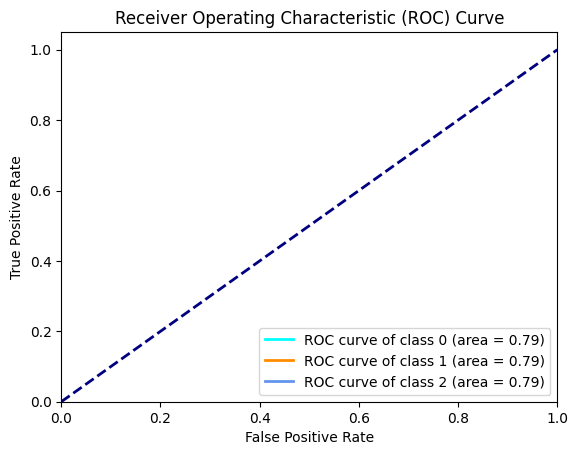

AUC: 0.7866796564803472


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Obtain probability predictions from the model
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC score (for multi-class classification)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
fpr = {}
tpr = {}
thresholds = {}

# Calculate ROC curve for each class
for i in range(y_prob.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)

# Plot the ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_prob.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# print AUC 
print(f'AUC: {roc_auc}')



**Model Selection and Performance Evaluation for Wine Quality Prediction:**

Initially, the RandomForestRegressor model was used to predict wine quality. In this model, the quality and total sulfur dioxide variables were dropped, and the model was trained. However, the accuracy of the model was found to be 54%.

Subsequently, the RandomForestClassifier model was used, and the quality variable was converted into a binary classification (quality value of 5 and above classified as 1, others as 0). With this transformation, the prediction accuracy of the model was achieved at 95%.

This result indicates that the classification approach is more successful than the regression approach in predicting wine quality.